Practice ML as part of Python for Machine Learning and Data Science MasterClass 2021 (Jose Portilla)

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data and Define Variables

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# Descriptive Statistics

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
X = df.drop(['sales'], axis=1)

In [8]:
y = df['sales']

# Polynomial Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Choosing Polynomial Degree

In [13]:
# Training error for each degree
train_rmse_errors = []
# Test error for each degree
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=43)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [28]:
test_rmse_errors

[1.4970926000396056,
 0.6432160642781083,
 0.567356713416664,
 0.5120354478661304,
 0.43836139171771515,
 0.6237133900161125,
 3.2076714225243026,
 21.496788977181478,
 896.3782656781923]

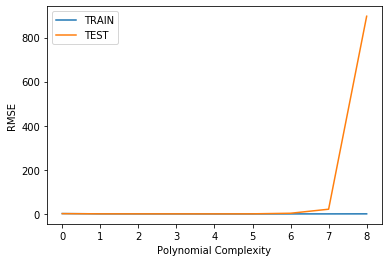

In [14]:
plt.plot(train_rmse_errors,label='TRAIN')
plt.plot(test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

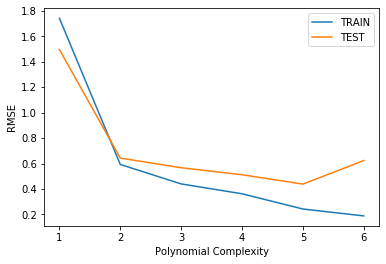

In [15]:
plt.plot(range(1,7),train_rmse_errors[:6],label='TRAIN')
plt.plot(range(1,7),test_rmse_errors[:6],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In terms of complexity, degree of 3 will be chosen. Polynomial degree 3 also has lower RMSE than Linear Regression (RMSE ~ 1.49) in the previous analysis

# Finalizing Model Choice

In [16]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [19]:
final_poly_features = final_poly_converter.fit_transform(X)

In [21]:
final_poly_features[0] 

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [22]:
final_poly_features.shape

(200, 19)

In [23]:
final_model = LinearRegression()

In [24]:
final_model.fit(final_poly_features,y)

LinearRegression()

# Predictions on New Unseen Data

In [25]:
campaign = [[149,22,12]]

In [26]:
campaign_features = final_poly_converter.fit_transform(campaign)

In [27]:
final_model.predict(campaign_features)

array([14.64501014])